# About the DataSet
We are using the Titanic Dataset here. It contains both numerical and string values.
NOTE- PLS READ THE README SECTION FOR DATASET TERMS EXPLANATION

# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\brave\Titanic-Dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape


(891, 12)

# Information about the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Checking for null/missing values in the dataset

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Dropping unnecessary columns

df.drop(columns="Cabin",axis=1,inplace=True)

In [10]:
#Filling the missing values of the age column by Mean value of the column

df.update({'Age': df['Age'].fillna(df['Age'].mean())})


In [12]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [13]:
df.isnull().sum().sum()

0

In [14]:
#Checking for duplicate values in the dataset

df.duplicated().sum()

0

In [15]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Visualization of survival of people

In [16]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

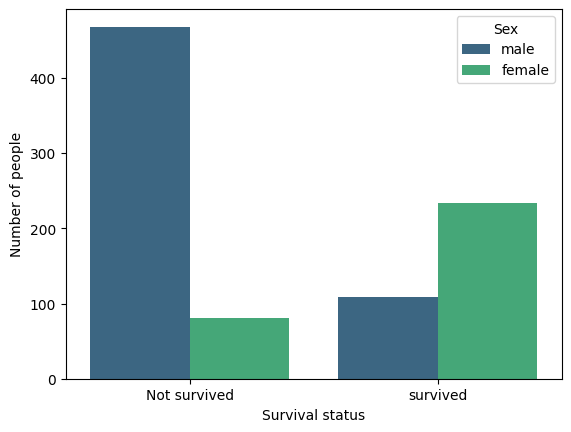

In [18]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

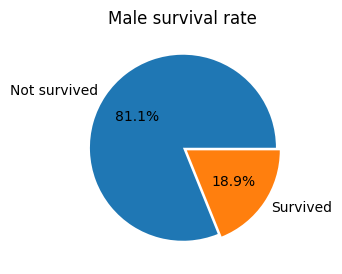

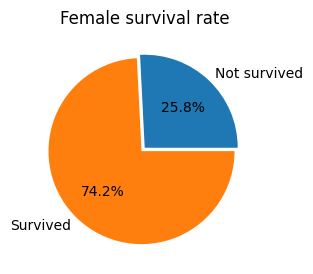

In [19]:
#Male survival rate

df[df['Sex'] == 'male'].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.ylabel("")
plt.title("Male survival rate")
plt.show()

#female surival rate

df[df['Sex'] == 'female'].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.ylabel("")
plt.title("Female survival rate")
plt.show()

C:\Users\Aakas\AppData\Local\Temp\ipykernel_17336\198483942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass',data=df,palette='pastel',)


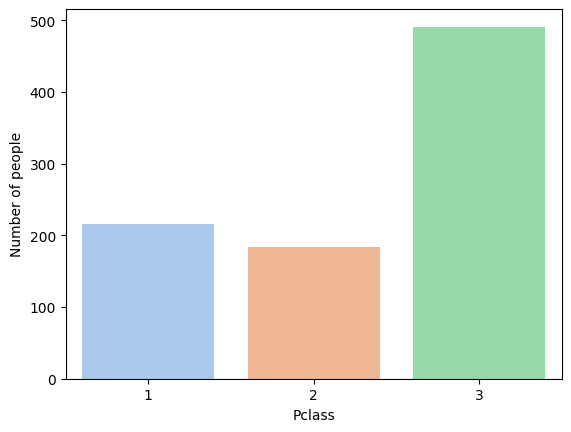

In [21]:
#visualizing the population of different passenger class
sns.countplot(x='Pclass',data=df,palette='pastel',)
plt.xlabel("Pclass")
plt.ylabel("Number of people")
plt.show()

C:\Users\Aakas\AppData\Local\Temp\ipykernel_17336\2975754143.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_cat_pivot = df.pivot_table(index="Age_categories", values="Survived")


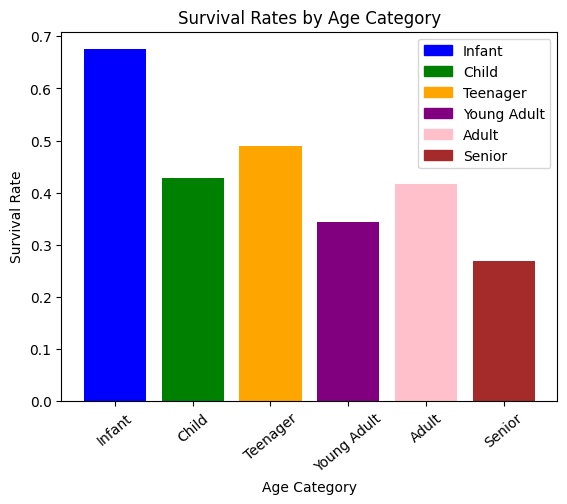

In [22]:
# Visualizing survival rate in different age category
# Define cut points and label names
cut_points = [ 0, 5, 12, 18, 35, 60, 100]
label_names = [ 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

# Create the "Age_categories" column
df['Age_categories'] = pd.cut(df['Age'], bins=cut_points, labels=label_names,right=False)

# Creating a pivot table for survival rates based on age categories
age_cat_pivot = df.pivot_table(index="Age_categories", values="Survived")

# Define colors for each bar
colors = ['blue', 'green', 'orange', 'purple', 'pink', 'brown']

# Plotting the bar chart with different colors for each bar
fig, ax = plt.subplots()
bars = ax.bar(age_cat_pivot.index, age_cat_pivot['Survived'], color=colors)

# Adding a legend with the specified colors
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in
range(len(colors))]
ax.legend(handles, label_names)
ax.set_title('Survival Rates by Age Category')
ax.set_xlabel('Age Category')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=40)
plt.show()